<a href="https://colab.research.google.com/github/ReAlex1902/ML/blob/master/sem9/%D0%9F%D1%80%D0%B8%D0%BC%D0%B5%D1%80_%D0%BA%D0%B0%D1%82%D0%B5%D0%B3%D0%BE%D1%80_%D0%BF%D1%80%D0%B8%D0%B7%D0%BD%D0%B0%D0%BA%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import sklearn.linear_model
import sklearn.model_selection
import sklearn.metrics
import sklearn.preprocessing
import sklearn.feature_extraction

%matplotlib inline

import matplotlib.pyplot as plt
from pprint import pformat
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
#загрузка файла, сразу меняем последний столбец со значениями 'yes/no' на 1/0 соответственно
#этот признак бинарный, поэтому его легко трактовать
PATH = '/content/gdrive/Shared drives/DigitalHome I UnlimitedDisc 3/Alex/datasets/ML/sem8/bank-additional-full.csv'
df = pd.read_csv(PATH, sep=';')
for col in ['y']:
    df[col] = np.where(df[col] == 'yes', 1, 0)
labels = df['y']
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [4]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                   int64
dtype: object

In [5]:
categorical_columns= [column for column in df.columns if df[column].dtype == 'object']
numerical_columns = [column for column in df.columns if df[column].dtype != 'object']

In [6]:
for column in categorical_columns:
    print('Признак: {}, кол-во уникальных значений: {}'.format(column,df[column].nunique()))
    print('Уникальные значения: ')
    print(df[column].value_counts(), '\n')
#Самостоятельно можно преобразовать признаки: default, housing, loan, contact, month, day_of_week, poutcome

Признак: job, кол-во уникальных значений: 12
Уникальные значения: 
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64 

Признак: marital, кол-во уникальных значений: 4
Уникальные значения: 
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64 

Признак: education, кол-во уникальных значений: 8
Уникальные значения: 
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64 

Признак: default, кол-во уникальных значений: 3
Уникальные значения: 
no         32588
unknown     8597
yes            3
Na

In [7]:
#Работа с категориальными признаками
#Рассмотрим признак default
#У него три значения yes|no|unknown. Преобразуем их в 1/0/0.5 соотвественно
df['default']=df['default'].map({'yes': 1, 'no': 0, 'unknown': 0.5})
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,0.0,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,0.5,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,0.0,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,0.0,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,0.0,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [8]:
#Аналогично поступаем с признаками housing и loan
df['housing']=df['housing'].map({'yes': 1, 'no': 0, 'unknown': 0.5})
df['loan']=df['loan'].map({'yes': 1, 'no': 0, 'unknown': 0.5})
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,0.0,0.0,0.0,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,0.5,0.0,0.0,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,0.0,1.0,0.0,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,0.0,0.0,0.0,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,0.0,0.0,1.0,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [9]:
#Рассмотрим признаки contact и poutcome
#В них всего 2 и 3 уникальных значения. Их можно пронумеровать так же 0\1 и 0\0.5\1 соотвественно
df['contact']=df['contact'].map({'cellular': 1, 'telephone': 0})
df['poutcome']=df['poutcome'].map({'success': 1, 'failure': 0, 'nonexistent': 0.5})
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,0.0,0.0,0.0,0,may,mon,261,1,999,0,0.5,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,0.5,0.0,0.0,0,may,mon,149,1,999,0,0.5,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,0.0,1.0,0.0,0,may,mon,226,1,999,0,0.5,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,0.0,0.0,0.0,0,may,mon,151,1,999,0,0.5,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,0.0,0.0,1.0,0,may,mon,307,1,999,0,0.5,1.1,93.994,-36.4,4.857,5191.0,0


In [10]:
#Рассмотрим признаки month и day_of_week. Пронумеруем месяцы и дни недели так, как их удобнее воспринимать человеку
df['month']=df['month'].map({'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12, 'mar': 3, 'apr':4})
df['day_of_week']=df['day_of_week'].map({'mon': 1, 'tue': 2, 'wed': 3, 'thu': 4, 'fri':5})
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,0.0,0.0,0.0,0,5,1,261,1,999,0,0.5,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,0.5,0.0,0.0,0,5,1,149,1,999,0,0.5,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,0.0,1.0,0.0,0,5,1,226,1,999,0,0.5,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,0.0,0.0,0.0,0,5,1,151,1,999,0,0.5,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,0.0,0.0,1.0,0,5,1,307,1,999,0,0.5,1.1,93.994,-36.4,4.857,5191.0,0


In [11]:
df.dtypes
#Таким образом у нас осталось 4 признака
#Возраст - числовой признак, остальные нечисловые, поэтому для них можно применить способы преобразования в числа

age                 int64
job                object
marital            object
education          object
default           float64
housing           float64
loan              float64
contact             int64
month               int64
day_of_week         int64
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome          float64
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                   int64
dtype: object

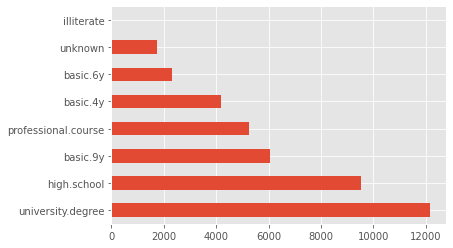

In [12]:
#рассматриваем, какие значения есть в столбце education
df['education'].value_counts().plot.barh()

In [13]:
#класс для преобразования категориальных признаков
label_encoder = sklearn.preprocessing.LabelEncoder()

{0: 'basic.4y', 1: 'basic.6y', 2: 'basic.9y', 3: 'high.school', 4: 'illiterate', 5: 'professional.course', 6: 'university.degree', 7: 'unknown'}


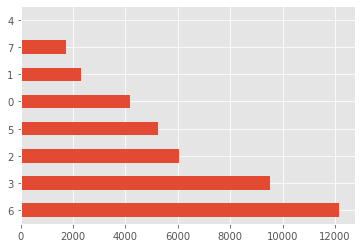

In [14]:
#преобразование education в числовой вектор 
mapped_education = pd.Series(label_encoder.fit_transform(df['education']))
mapped_education.value_counts().plot.barh()
print(dict(enumerate(label_encoder.classes_)))

In [15]:
#попробуем ввести категорию, которой нет в списке
try:
    label_encoder.transform(df['education'].replace('secondary', 'secondary'))
except Exception as e:
    print('Error:', e)

In [16]:
df['education'] = mapped_education
df.head()
#В данном способе преобразовались все значения признака education, у котрого было 8 уникальных значений

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,0,0.0,0.0,0.0,0,5,1,261,1,999,0,0.5,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,3,0.5,0.0,0.0,0,5,1,149,1,999,0,0.5,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,3,0.0,1.0,0.0,0,5,1,226,1,999,0,0.5,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,1,0.0,0.0,0.0,0,5,1,151,1,999,0,0.5,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,3,0.0,0.0,1.0,0,5,1,307,1,999,0,0.5,1.1,93.994,-36.4,4.857,5191.0,0


In [17]:
#Попробуем преобразовать признак job с помощью one hot encoding
one_hot_example = pd.DataFrame([{i: 0 for i in range(12)}])
one_hot_example.loc[0, 6] = 1
one_hot_example

,0,1,2,3,4,5,6,7,8,9,10,11
0,0,0,0,0,0,0,1,0,0,0,0,0


In [18]:
onehot_encoder = sklearn.preprocessing.OneHotEncoder(sparse=False)

In [19]:
encoded_categorical_columns = pd.DataFrame(onehot_encoder.fit_transform(df['job'].values.reshape(-1, 1)))
encoded_categorical_columns.head()
#Полученную матрицу присоединим к нашей таблице, удаляя при этом столбец job

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [20]:
encoded_categorical_columns.shape

(41188, 12)

In [21]:
df=pd.concat([encoded_categorical_columns, df], axis=1)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56,housemaid,married,0,0.0,0.0,0.0,0,5,1,261,1,999,0,0.5,1.1,93.994,-36.4,4.857,5191.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,57,services,married,3,0.5,0.0,0.0,0,5,1,149,1,999,0,0.5,1.1,93.994,-36.4,4.857,5191.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,37,services,married,3,0.0,1.0,0.0,0,5,1,226,1,999,0,0.5,1.1,93.994,-36.4,4.857,5191.0,0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40,admin.,married,1,0.0,0.0,0.0,0,5,1,151,1,999,0,0.5,1.1,93.994,-36.4,4.857,5191.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,56,services,married,3,0.0,0.0,1.0,0,5,1,307,1,999,0,0.5,1.1,93.994,-36.4,4.857,5191.0,0


In [22]:
df.drop('job', axis =1, inplace =True)

In [23]:
#Остался последний нечисловой признак - marital, содержащий 4 значения.
#В принципе можно его самостоятельно обработать. Однако лучше попробовать ещё один метод - хэширование
#сначала в этом методе вычисляется hash_space (пространство для категориальных столбцов с больше чем 3 признаками)
hash_space=0
for i in ['marital']:
    hash_space= len(df[i].unique())
hash_space
#оно ожидаемо получилось равным 4

4

In [24]:
#Замена значений хэшированными
for i in ['marital']:
    z=[]
    for j in range(len(df)):
        z.append(hash(df[i].loc[j]) % hash_space)
    df[i]=z

In [25]:
#Теперь все признаки числовые и можно строить различные модели
#Сперва проведём стандартизацию данных
from sklearn import preprocessing

min_max_scaler=preprocessing.MinMaxScaler()
df[df.columns]=min_max_scaler.fit_transform(df)

In [26]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,age,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.481481,0.0,0.000000,0.0,0.0,0.0,0.0,0.222222,0.0,0.053070,0.0,1.0,0.0,0.5,0.9375,0.698753,0.60251,0.957379,0.859735,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.493827,0.0,0.428571,0.5,0.0,0.0,0.0,0.222222,0.0,0.030297,0.0,1.0,0.0,0.5,0.9375,0.698753,0.60251,0.957379,0.859735,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.246914,0.0,0.428571,0.0,1.0,0.0,0.0,0.222222,0.0,0.045954,0.0,1.0,0.0,0.5,0.9375,0.698753,0.60251,0.957379,0.859735,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.283951,0.0,0.142857,0.0,0.0,0.0,0.0,0.222222,0.0,0.030704,0.0,1.0,0.0,0.5,0.9375,0.698753,0.60251,0.957379,0.859735,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.481481,0.0,0.428571,0.0,0.0,1.0,0.0,0.222222,0.0,0.062424,0.0,1.0,0.0,0.5,0.9375,0.698753,0.60251,0.957379,0.859735,0.0


In [27]:
X=df.drop('y',axis=1)
y=df['y']

In [28]:
#Разбиваем на тестовую и контрольную выборки
from sklearn.model_selection import train_test_split, StratifiedKFold
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size=0.3, random_state=17)

1. Применить методы kNN и DT для задачи бинарной классификации
2. Найти оптимальные параметры
3. Вывести качество обучения на тестовой выборке обеими методами (accuracy, RMSE)
4. Сделать выводы

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score

knn = KNeighborsClassifier()
params = {
    'n_neighbors': np.arange(5, 44, 4)
}

knn = GridSearchCV(knn, params, n_jobs = -1, verbose = True)

knn.fit(X_train, y_train)

print()
print(f'Accuracy: {accuracy_score(knn.predict(X_test), y_test)}')
print(f'F1: {f1_score(knn.predict(X_test), y_test)}')

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  3.1min finished



Accuracy: 0.8973860969490977
F1: 0.3048245614035087


In [30]:
print(f'Accuracy: {accuracy_score(knn.predict(X_train), y_train)}')
print(f'F1: {f1_score(knn.predict(X_train), y_train)}')

Accuracy: 0.9004890569179008
F1: 0.3004145330407218


In [34]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 11)

dt.fit(X_train, y_train)

print(f'Accuracy: {accuracy_score(dt.predict(X_test), y_test)}')
print(f'F1: {f1_score(dt.predict(X_test), y_test)}')

Accuracy: 0.8892125920530873
F1: 0.518804920913884


In [32]:
print(f'Accuracy: {accuracy_score(dt.predict(X_train), y_train)}')
print(f'F1: {f1_score(dt.predict(X_train), y_train)}')

Accuracy: 1.0
F1: 1.0


(array([36548.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  4640.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

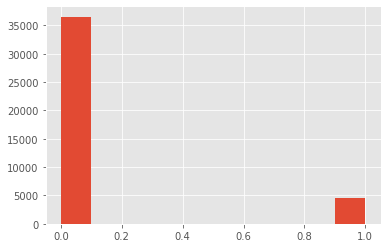

In [33]:
import matplotlib.pyplot as plt
plt.hist(df['y'])

Вывод (KNN) - недообучение \
1) Очень несбалансированный датасет \
2) Неправильный подход 

Вывод (DT) - переобучение \
1) Неправильные гипперпараметры \
2) Неправильный подход (стоит попробовать ансамбли)